In [20]:
from scipy.stats import beta
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

## Using Beta Distribution

If you have test with kk success amongst nn trials, your posterior distribution is Beta(k+1,n−k+1)
(Note: This is assuming you have no prior; we'll address this later when we talk about hierarchical models. This is also assuming that the trials are IID Bernoulli; we'll address this later when we talk about inspecting the test's time series.)


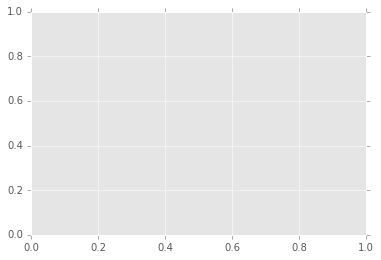

In [2]:
fig, ax = plt.subplots(1, 1);
a, b = 61, 41
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk');

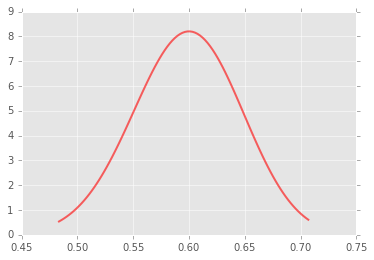

In [3]:
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),
         'r-', lw=2, alpha=0.6, label='beta pdf')

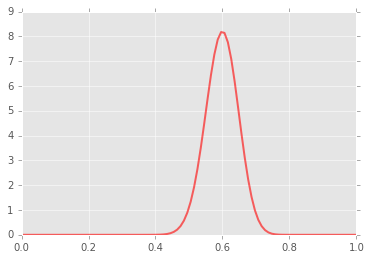

In [7]:
z = np.linspace(0, 1.0, 100)
y1 = beta.pdf(z, a, b)
ax.set_title("occc", loc="right", fontsize=10);
plt.plot(z, y1,'r-', lw=2, alpha=0.6, label='beta pdf')

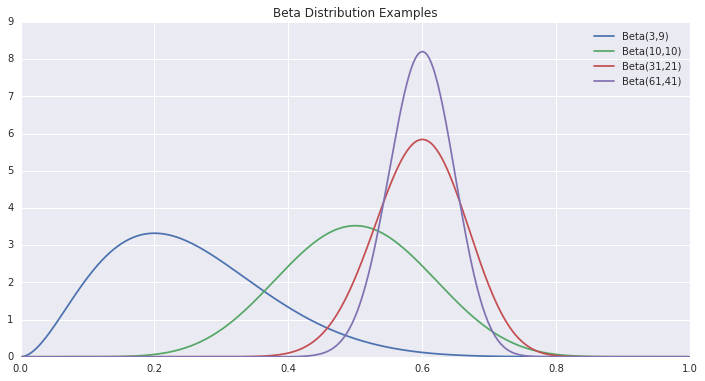

In [38]:
support = np.linspace(0,1, 500)[1:-1]

a_vals = [3, 10, 31, 61]
b_vals = [9, 10, 21, 41]
for a,b in zip(a_vals, b_vals):
    plt.plot(support, beta(a,b).pdf(support), label = "Beta(%s,%s)" %(a,b))
plt.legend()
plt.ylim(0,9)
plt.title("Beta Distribution Examples");

Let's generate 10 million t between 0 and 1, and then pull a single sample from a Bin(t,100) distribution from each. Then we'll draw a histogram for those t such that Bin(t,100)=60. The claim is that this histogram will follow a Beta(61,41) distribution. The idea here is to simulate 10 million experiments where we observed 60 successes out of 100 trials, and then see what the true success rate actually was in those experiments. Here it is:

In [33]:
true_rates = np.random.uniform(0, 1, size=10000000)
obs = np.random.binomial(100, true_rates)

In [34]:
obs60_indices = np.where(obs == 60)
obs20_indices = np.where(obs == 20)

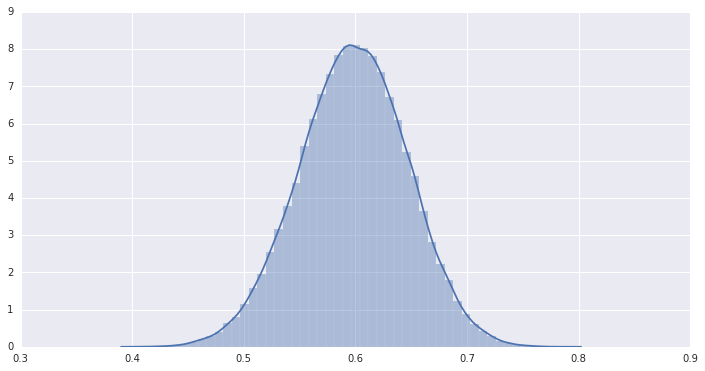

In [36]:
sns.distplot(true_rates[obs60_indices])
# sns.distplot(true_rates[obs20_indices])

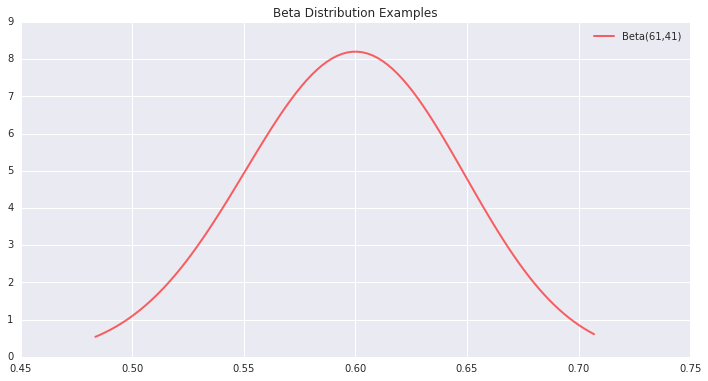

In [45]:
support = np.linspace(0,1, 500)[1:-1]
a, b = 61,41

plt.title("Beta Distribution Examples");
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),
         'r-', lw=2, alpha=0.6, label="Beta(%s,%s)" %(a,b))
plt.legend()

In [28]:
obs

array([27, 36, 25, ..., 10, 61, 44])

In [30]:
true_rates[obs60_indices]

array([ 0.55810698,  0.56695014,  0.59486089, ...,  0.57676799,
        0.56334586,  0.61286023])

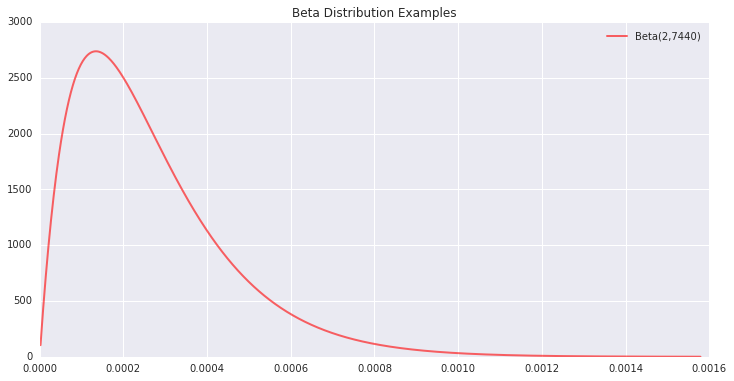

In [63]:
a, b = 2,7440

plt.title("Beta Distribution Examples");
x = np.linspace(beta.ppf(0.0001, a, b),
              beta.ppf(0.9999, a, b), 1000)
plt.plot(x, beta.pdf(x, a, b),
         'r-', lw=2, alpha=0.6, label="Beta(%s,%s)" %(a,b))
plt.legend()

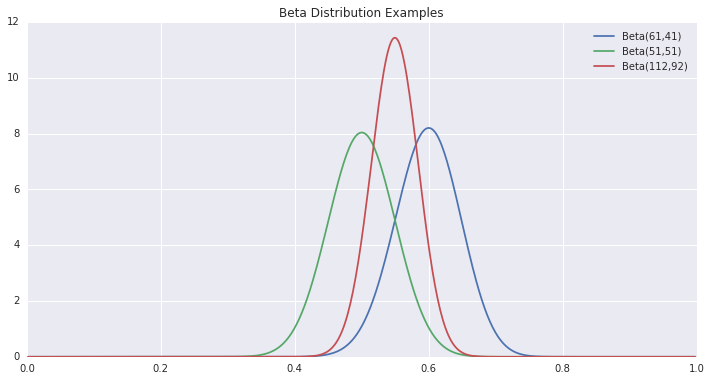

In [68]:
support = np.linspace(0,1, 500)[1:-1]

a_vals = [61, 51, 112]
b_vals = [41, 51, 92]
for a,b in zip(a_vals, b_vals):
    plt.plot(support, beta(a,b).pdf(support), label = "Beta(%s,%s)" %(a,b))
plt.legend()
plt.ylim(0,12)
plt.title("Beta Distribution Examples");

In [70]:
true_rates = np.random.beta(51, 51, size=10000000)
obs = np.random.binomial(100, true_rates)

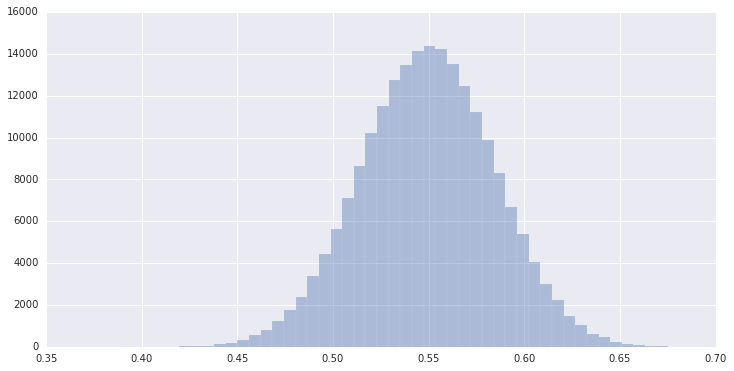

In [84]:
obs_60 = np.where(obs == 60)
true_rates_60 = true_rates[obs_60]
sns.distplot(true_rates_60, bins=50, kde=False)

In [119]:
import pymc

@pymc.stochastic(dtype=np.float64)
def hyperpriors(value=[1.0, 1.0]):
    a, b = value[0], value[1]
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

a = hyperpriors[0]
b = hyperpriors[1]

# This is what we don't know, but would like to find out
true_rates = pymc.Beta('true_rates', a, b, size=10)

# This is what we observed
trials = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])
successes = np.array([40, 44, 47, 54, 63, 46, 44, 49, 58, 50])
observed_values = pymc.Binomial('observed_values', trials, true_rates, observed=True, value=successes)

model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

# Generate 1M samples, and throw out the first 500k
mcmc.sample(1000000, 500000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 241.6 sec

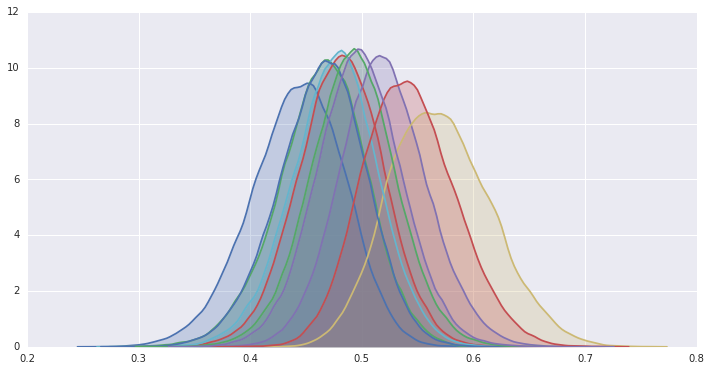

In [122]:
posteriors = []
for i in range(10):
    posteriors.append(mcmc.trace('true_rates')[:][:,i])

for posterior in posteriors:
    sns.kdeplot(posterior, shade=True)

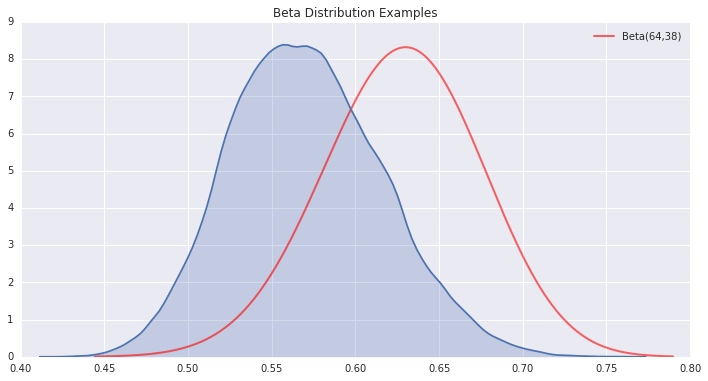

In [127]:
a, b = 64,38

plt.title("Beta Distribution Examples");
x = np.linspace(beta.ppf(0.0001, a, b),
              beta.ppf(0.9999, a, b), 1000)
plt.plot(x, beta.pdf(x, a, b),
         'r-', lw=2, alpha=0.6, label="Beta(%s,%s)" %(a,b))
plt.legend()
sns.kdeplot(posteriors[4], shade=True)

In [128]:
mcmc.trace('true_rates')[:][:,4].mean()

0.57070287212134241

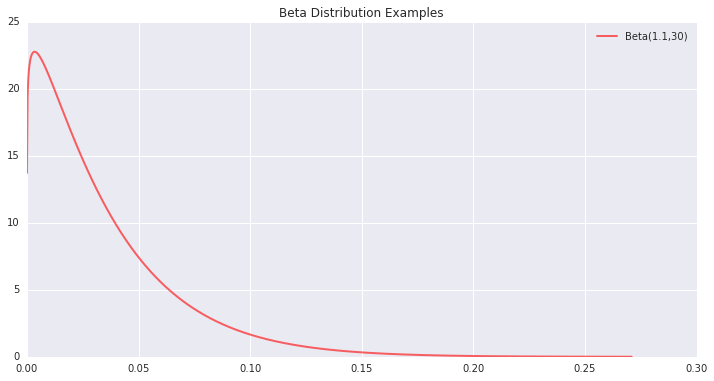

In [138]:
a, b = 1.1,30

plt.title("Beta Distribution Examples");
x = np.linspace(beta.ppf(0.0001, a, b),
              beta.ppf(0.9999, a, b), 1000)
plt.plot(x, beta.pdf(x, a, b),
         'r-', lw=2, alpha=0.6, label="Beta(%s,%s)" %(a,b))
plt.legend()

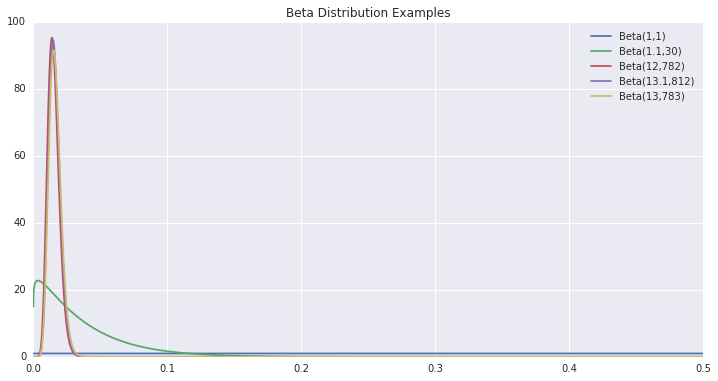

In [141]:
support = np.linspace(0,1, 50000)[1:-1]

a_vals = [1,1.1, 12, 13.1,13,]
b_vals = [1,30, 782, 812, 783]
for a,b in zip(a_vals, b_vals):
    plt.plot(support, beta(a,b).pdf(support), label = "Beta(%s,%s)" %(a,b))
plt.legend()
plt.xlim(0,0.5)
plt.title("Beta Distribution Examples");

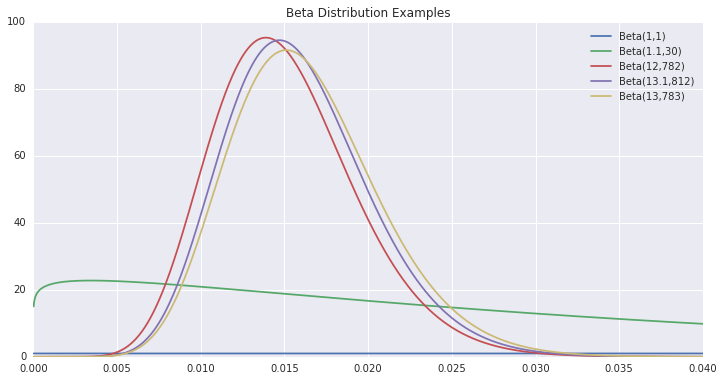

In [145]:
support = np.linspace(0,1, 50000)[1:-1]

a_vals = [1,1.1, 12, 13.1,13]
b_vals = [1,30, 782, 812, 783]
for a,b in zip(a_vals, b_vals):
    plt.plot(support, beta(a,b).pdf(support), label = "Beta(%s,%s)" %(a,b))
plt.legend()
plt.xlim(0,0.04)
plt.title("Beta Distribution Examples");

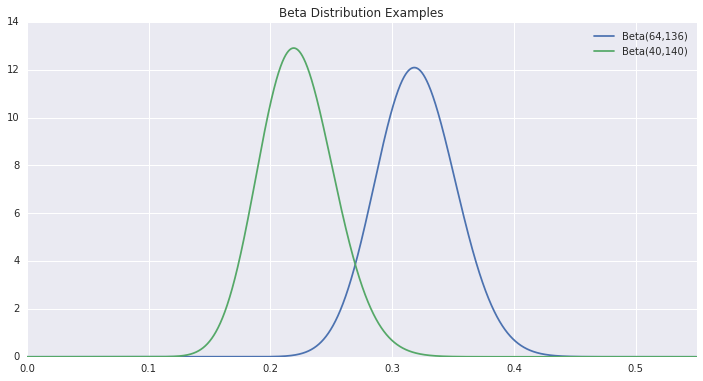

In [148]:
support = np.linspace(0,1, 50000)[1:-1]

a_vals = [64,40]
b_vals = [136,140]
for a,b in zip(a_vals, b_vals):
    plt.plot(support, beta(a,b).pdf(support), label = "Beta(%s,%s)" %(a,b))
plt.legend()
plt.xlim(0,0.55)
plt.title("Beta Distribution Examples");